In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import datetime as dt
%matplotlib notebook
#!pip install sounddevice
import sounddevice

In [2]:
# fs Sample rate
fs = 1000
t = np.arange(0,10,1/fs)

In [3]:
#https://piano-music-theory.com/2016/05/29/musical-note-sounds-pitches-and-their-frequency/

In [4]:
f1 = 261.63
f2 = 329.63
f3 = 393
n1=np.sin(2*np.pi*f1*t)
n2=np.sin(2*np.pi*f2*t)
n3=np.sin(2*np.pi*f3*t)
noise = np.array([np.random.randn() for xx in n3])/5

<IPython.core.display.Javascript object>


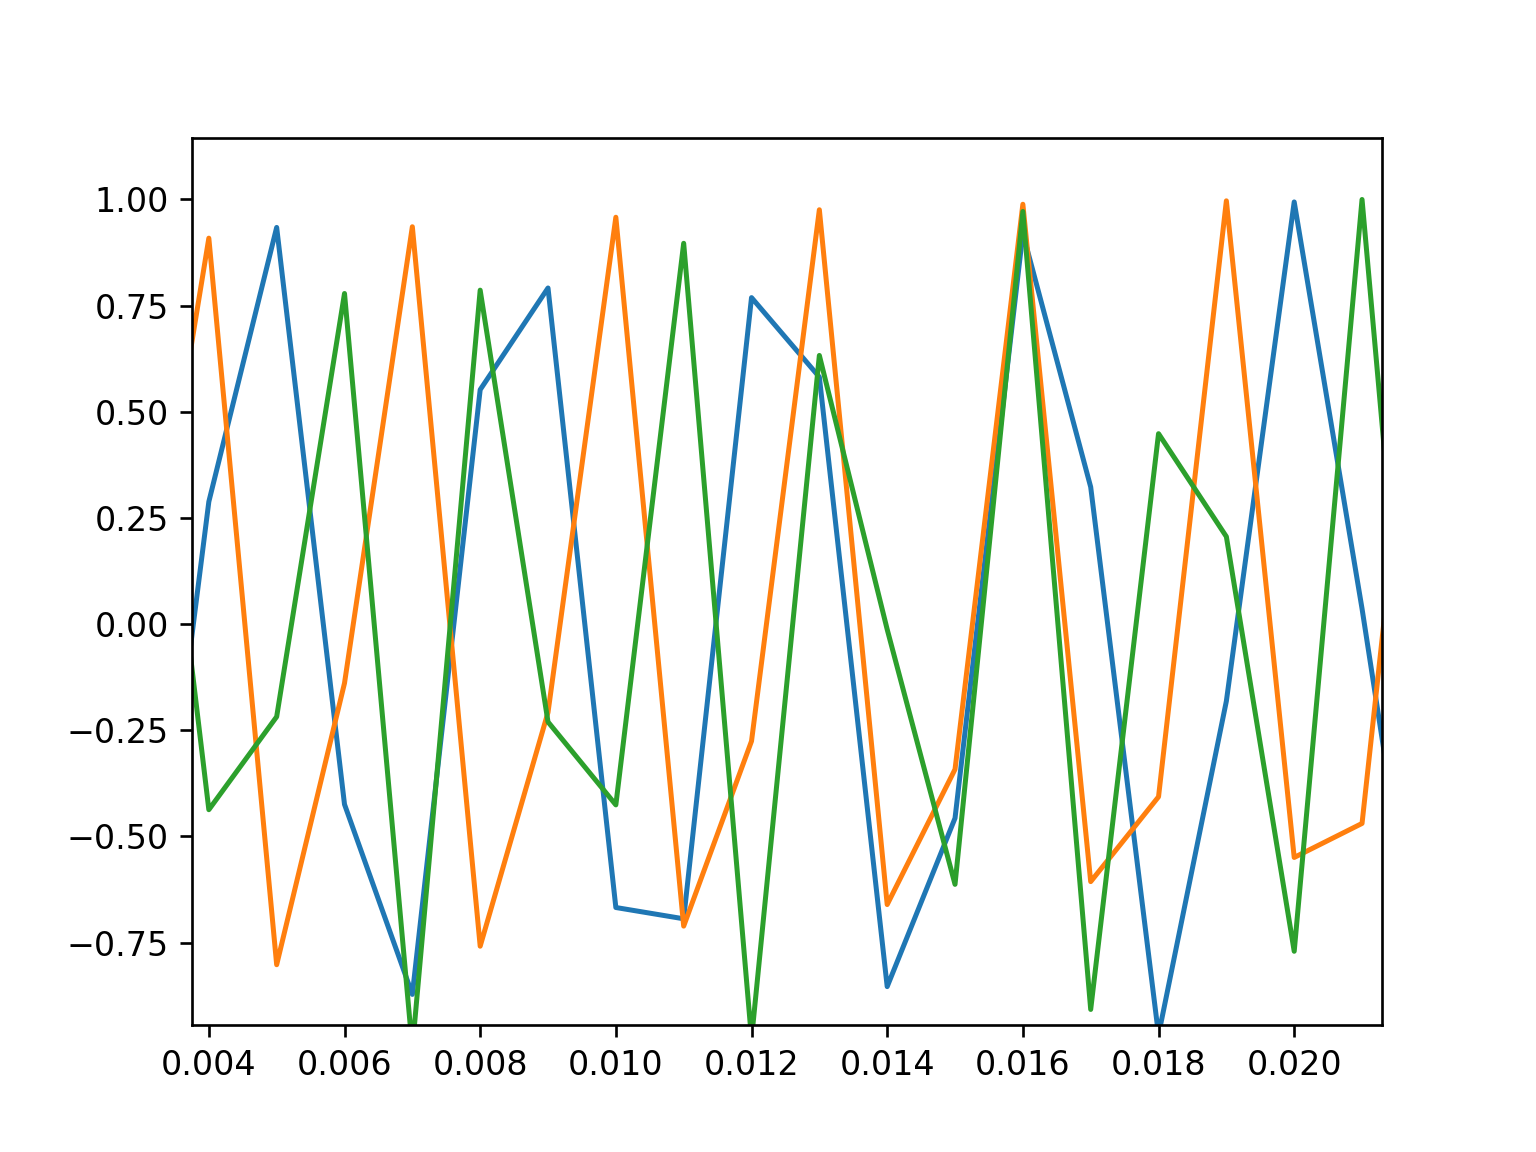

In [16]:
%matplotlib notebook
w = n1+n2+n3+noise
plt.figure(1)
plt.plot(t,n1)
plt.plot(t,n2)
plt.plot(t,n3)

<IPython.core.display.Javascript object>


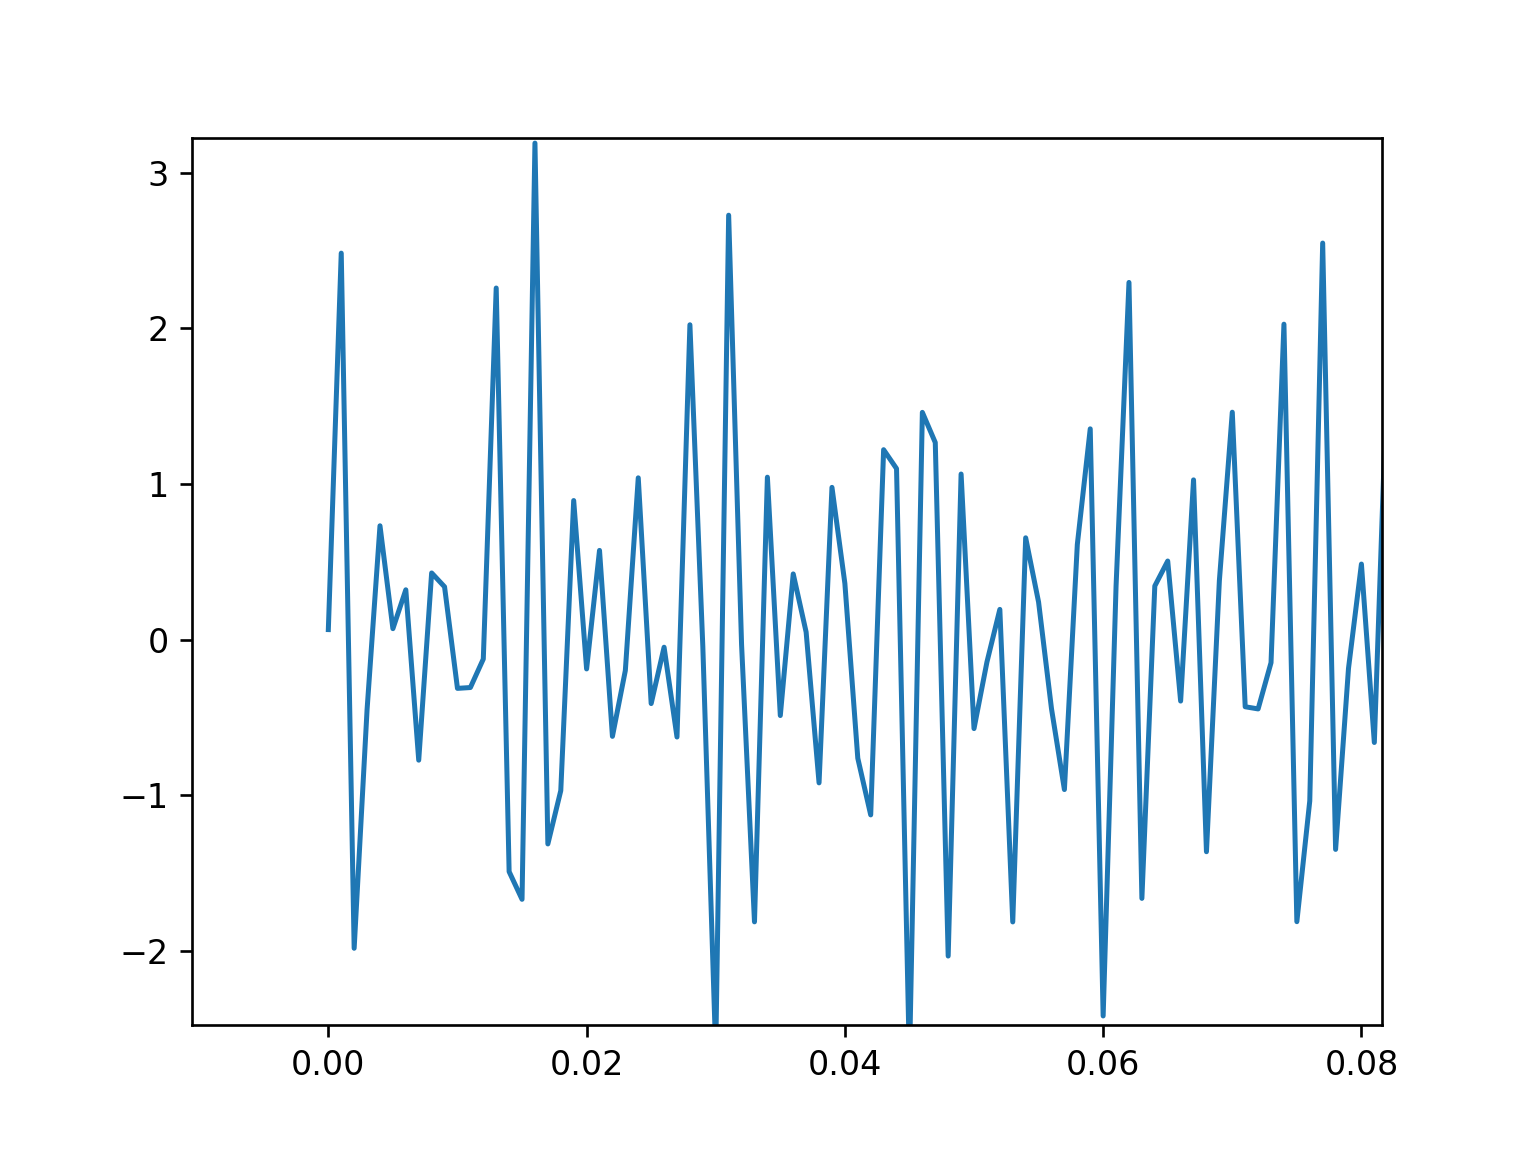

In [17]:
plt.figure(2)
plt.plot(t,w)

<IPython.core.display.Javascript object>


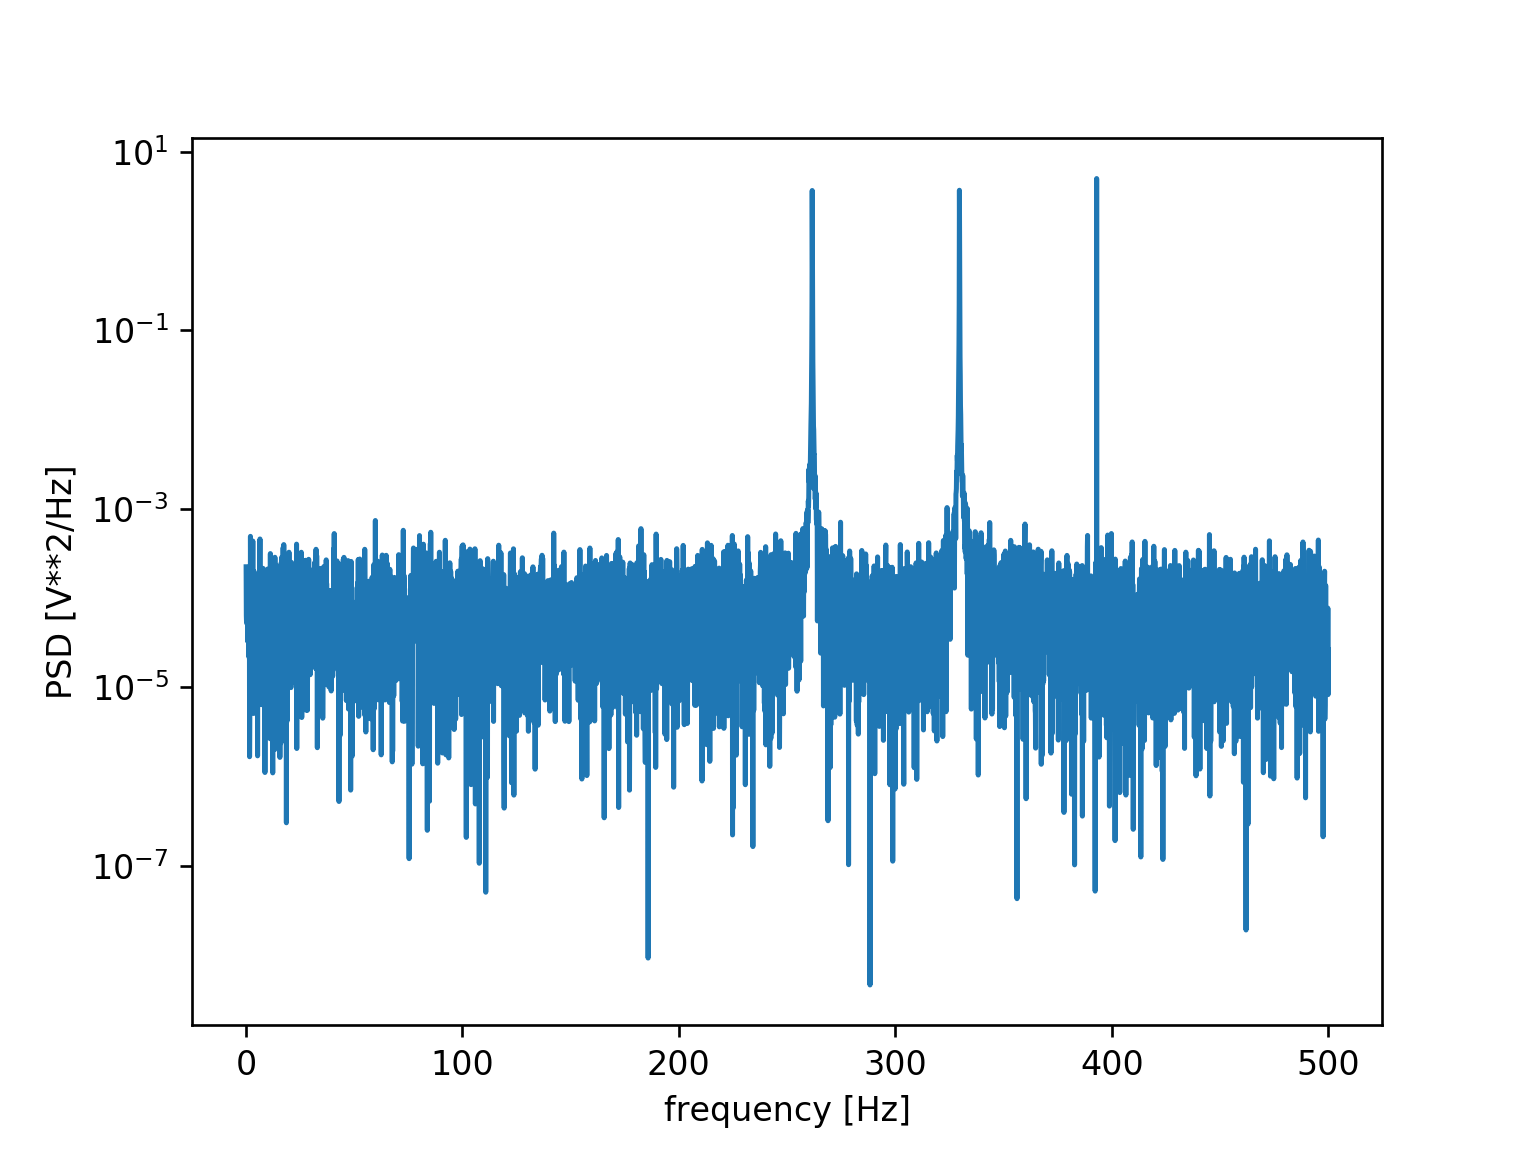

Text(0, 0.5, 'PSD [V**2/Hz]')

In [7]:
from scipy import signal
plt.figure(3)

f, Pxx_den = signal.periodogram(w,fs=fs)
plt.semilogy(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#>>> plt.show()
# Fourier Analysis  (Fast Fourier Transform)

In [8]:
import sounddevice as sd

fs = 1000
sd.play(w, fs)

In [9]:
# "High pass" filter
filt = signal.firwin(101, .75, pass_zero=False)

In [10]:
filtered = np.convolve(filt, w)



<IPython.core.display.Javascript object>


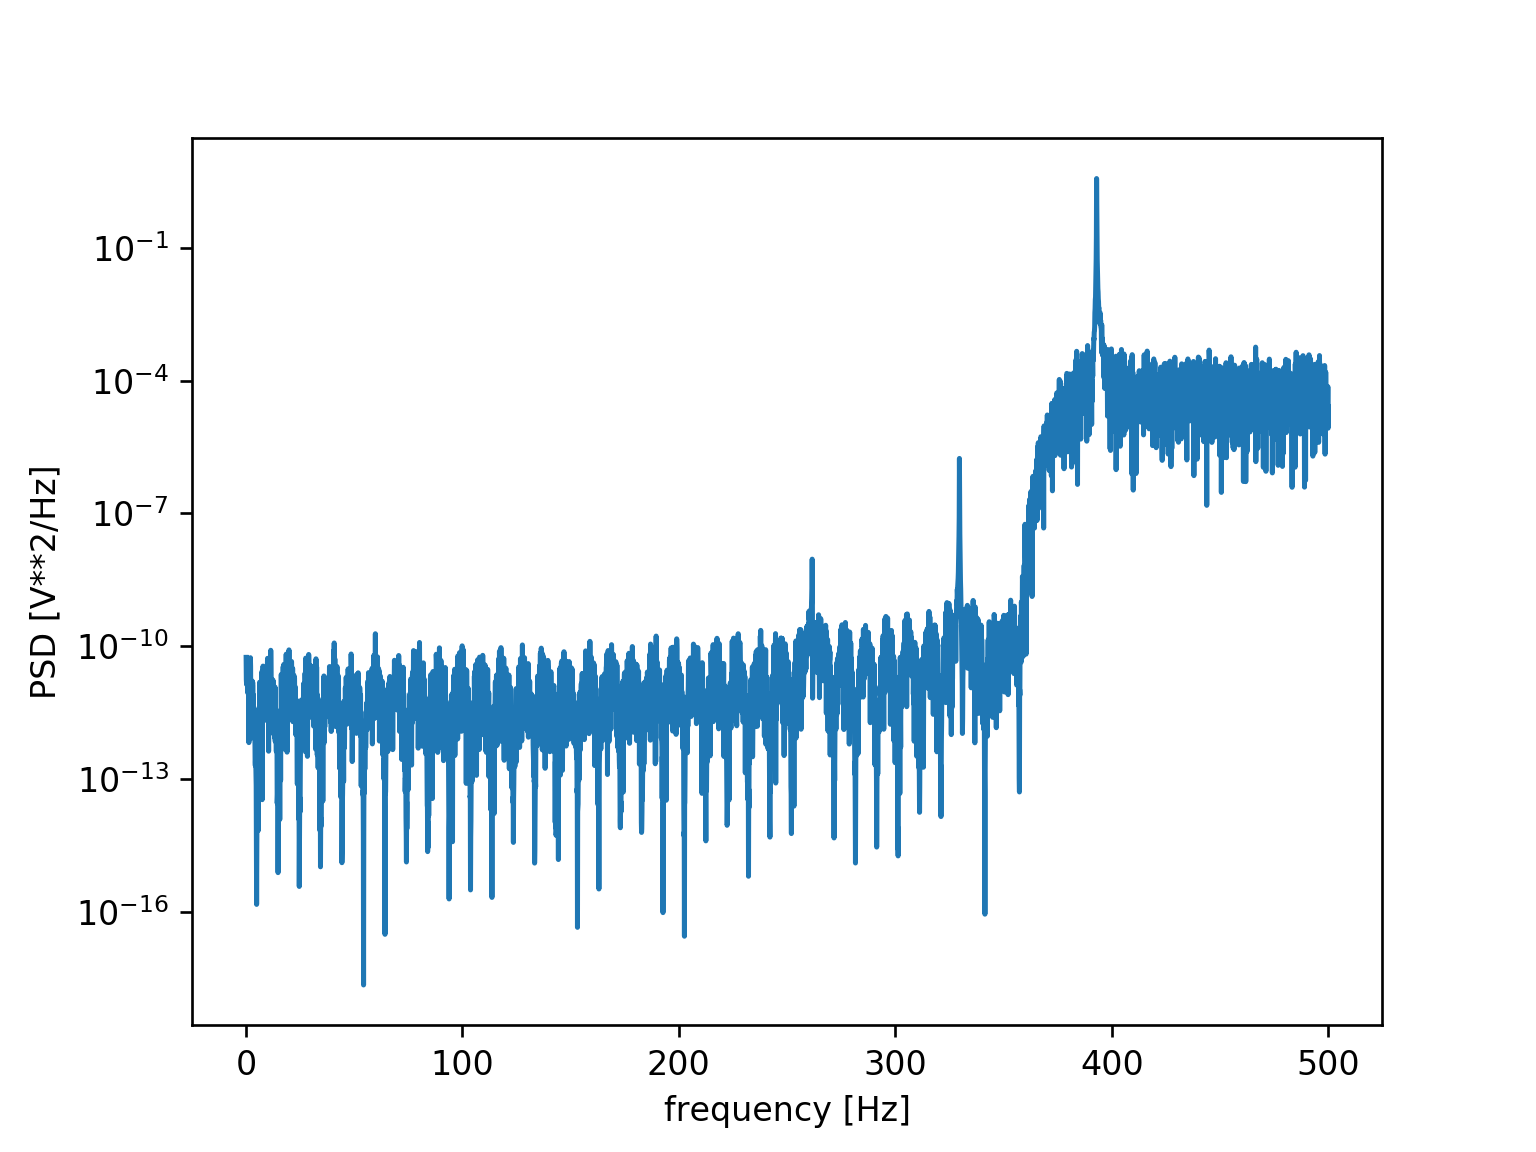

Text(0, 0.5, 'PSD [V**2/Hz]')

In [11]:
plt.figure(4)
f, Pxx_den = signal.periodogram(filtered,fs=fs)
plt.semilogy(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#>>> plt.show()

In [20]:
#sd.play(w, fs)
sd.play(filtered, fs)

## Aliasing

https://www.youtube.com/watch?v=2pbYKDW0myU


In [13]:
ff = '../BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372/co2a0000372.rd.021'

In [14]:
df=pd.read_csv(ff  ,sep=' ',skiprows=4, comment='#',header=None)
df.columns=['Trial','Channel','Time','uV']
dfp = df.pivot(index='Time', columns='Channel',values='uV')

<IPython.core.display.Javascript object>


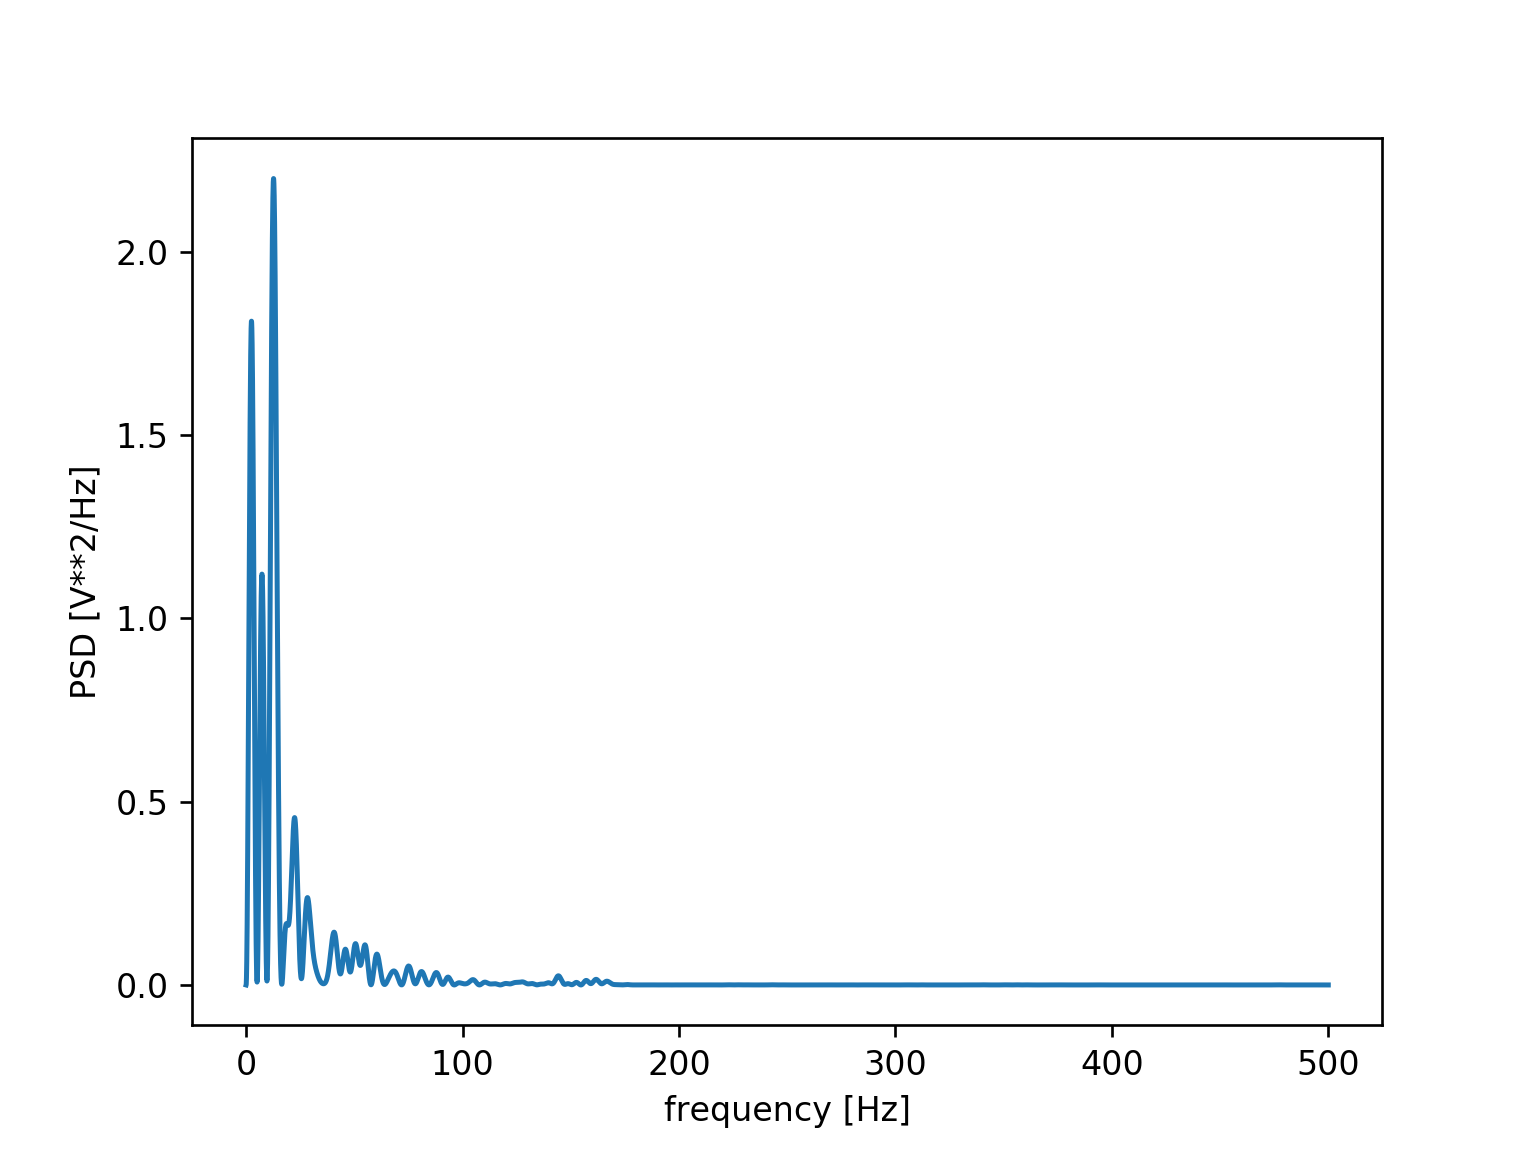

Text(0, 0.5, 'PSD [V**2/Hz]')

In [21]:
plt.figure(5)
f, Pxx_den = signal.periodogram(dfp.AFZ,fs=fs, nfft=2**19)
#plt.semilogy(f[1:-1], Pxx_den[1:-1])
plt.plot(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#dfp.C5